# Exploratory Data Analysis (EDA) - Part 2
- Temporal analysis
- Usage patterns
- Plant analysis

In [7]:
import numpy as np
import pandas as pd

In [8]:
plant_nan = pd.read_csv('../Data/clean/plantanet_internet_gdp_nan.csv', sep=',') # import dataset with missing values to avoid bias in analysis and plotting
display(plant_nan.shape)
display(plant_nan.columns)
display(plant_nan.head())
plant_nan.isnull().sum()/len(plant_nan)

(150000, 18)

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'decimallatitude', 'decimallongitude',
       'eventdate', 'day', 'month', 'year', 'country', 'incomeperperson',
       'internetuserate', 'urbanrate'],
      dtype='object')

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,decimallatitude,decimallongitude,eventdate,day,month,year,country,incomeperperson,internetuserate,urbanrate
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,39.737365,-0.828874,2016-05-28 11:32:01.482,28,5,2016,Spain,15461.75837,65.808554,77.12
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,43.068620,5.817762,2019-08-18 12:02:28.413,18,8,2019,France,22878.46657,77.498619,77.36
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,45.852500,-0.155000,2022-05-20 21:10:09.158,20,5,2022,France,22878.46657,77.498619,77.36
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,43.151389,5.736667,2019-04-14 10:50:38.537,14,4,2019,France,22878.46657,77.498619,77.36
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,48.079440,7.587583,2022-03-14 14:36:23.989,14,3,2022,Germany,25306.18719,82.526898,73.64


occurrenceid        0.000000
class               0.000000
order               0.000000
family              0.000000
genus               0.000000
species             0.000000
scientificname      0.000000
countrycode         0.000000
decimallatitude     0.000000
decimallongitude    0.000000
eventdate           0.000000
day                 0.000000
month               0.000000
year                0.000000
country             0.000000
incomeperperson     0.004453
internetuserate     0.004340
urbanrate           0.004020
dtype: float64

In [9]:
plant_nan.describe().T #verify min and max values of all variables (no zero)

,count,mean,std,min,25%,50%,75%,max
decimallatitude,150000.0,45.433473,11.069672,-54.807064,43.666867,47.179853,50.259018,71.112304
decimallongitude,150000.0,-0.343254,30.954318,-176.178948,-0.071390,5.594533,10.274014,176.910963
day,150000.0,15.827900,8.788527,1.000000,8.000000,16.000000,23.000000,31.000000
month,150000.0,6.308207,2.181246,1.000000,5.000000,6.000000,8.000000,12.000000
year,150000.0,2020.582813,1.337024,2010.000000,2020.000000,2021.000000,2022.000000,2022.000000
incomeperperson,149332.0,22916.161804,8273.012359,103.775857,18982.269290,22878.466570,26551.844240,105147.437700
internetuserate,149349.0,73.798130,12.589694,0.720009,69.770394,77.498619,82.166660,95.638113
urbanrate,149397.0,75.912027,8.294944,12.980000,73.500000,77.360000,77.360000,100.000000


In [10]:
# create bins for internetuserate
bin_labels5 = ['very low', 'low', 'middle', 'high', 'very high']
plant_nan['internetuserate_groups'] = pd.cut(plant_nan['internetuserate'],
                                                    [0, 40, 60, 75, 85, 100], labels=bin_labels5,
                                                    precision=0)

In [11]:
# group countries by region
africa = ['DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD', 'CI', 'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'KE', 'LS', 'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'YT', 'MA', 'MZ', 'NA', 'NE', 'NG', 'RE', 'RW', 'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG', 'EH', 'ZM', 'ZW']
asia = ['AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CY', 'GE', 'IN', 'ID', 'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KW', 'KG', 'LA', 'LB', 'MY', 'MV', 'MN', 'MM', 'NP', 'KP', 'OM', 'PK', 'PS', 'PH', 'QA', 'SA', 'SG', 'KR', 'LK', 'SY', 'TW', 'TJ', 'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE']
europe = ['AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FO', 'FI', 'FR', 'DE', 'GI', 'GR', 'HU', 'IS', 'IE', 'IM', 'IT', 'XK', 'LV', 'LI', 'LT', 'LU', 'MK', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA']
north_america = ['AG', 'BS', 'BB', 'BZ', 'CA', 'CR', 'CU', 'CW', 'DM', 'DO', 'SV', 'GL', 'GD', 'GT', 'HT', 'HN', 'JM', 'MX', 'MS', 'NI', 'PA', 'PR', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'US', 'VG', 'VI']
south_america = ['AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'FK', 'GF', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE']
oceania = ['AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU', 'MP', 'PW', 'PG', 'PN', 'WS', 'SB', 'TK', 'TO', 'TV', 'UM', 'VU', 'WF']

def get_region(countrycode):
    if countrycode in africa:
        return 'Africa'
    elif countrycode in asia:
        return 'Asia'
    elif countrycode in europe:
        return 'Europe'
    elif countrycode in north_america:
        return 'North America'
    elif countrycode in south_america:
        return 'South America'
    elif countrycode in oceania:
        return 'Oceania'
    else:
        return 'unknown'
    
plant_nan['region'] = plant_nan['countrycode'].apply(get_region)
plant_nan.head()

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,decimallatitude,decimallongitude,eventdate,day,month,year,country,incomeperperson,internetuserate,urbanrate,internetuserate_groups,region
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,39.737365,-0.828874,2016-05-28 11:32:01.482,28,5,2016,Spain,15461.75837,65.808554,77.12,middle,Europe
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,43.068620,5.817762,2019-08-18 12:02:28.413,18,8,2019,France,22878.46657,77.498619,77.36,high,Europe
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,45.852500,-0.155000,2022-05-20 21:10:09.158,20,5,2022,France,22878.46657,77.498619,77.36,high,Europe
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,43.151389,5.736667,2019-04-14 10:50:38.537,14,4,2019,France,22878.46657,77.498619,77.36,high,Europe
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,48.079440,7.587583,2022-03-14 14:36:23.989,14,3,2022,Germany,25306.18719,82.526898,73.64,high,Europe


In [22]:
# number of entries per region
regional_entries = plant_nan.groupby('region').agg({'occurrenceid':'count'}).rename(columns={'occurrenceid':'total_entries'}).reset_index()
regional_entries

,region,total_entries
0,Africa,710
1,Asia,1718
2,Europe,132966
3,North America,12279
4,Oceania,609
5,South America,1455
6,unknown,263


## Temporal analysis
### Annual patterns

In [13]:
# number of entries per year
annual_entries_df = plant_nan.groupby('year').agg({'occurrenceid':'count'}).rename(columns={'occurrenceid':'total_entries'}).reset_index()
annual_entries_df

,year,total_entries
0,2010,1
1,2011,7
2,2012,10
3,2013,19
4,2014,34
5,2015,172
6,2016,1484
7,2017,2168
8,2018,6784
9,2019,18287


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

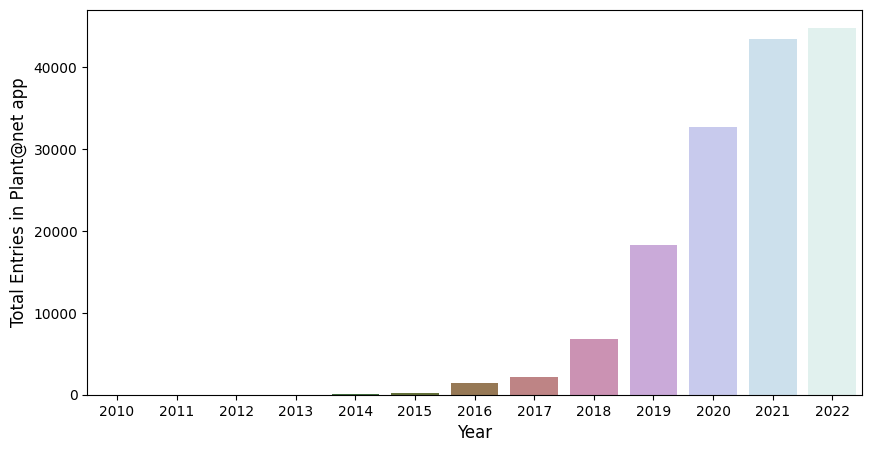

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='year', data=plant_nan, palette = "cubehelix", ax=ax)
# Set label for x-axis
ax.set_xlabel( "Year" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Total Entries in Plant@net app" , size = 12 )
plt.show()

As seen in the section before and in the EDA_1 analysis, Europe is the country, by far, with higher number of entries. Let's have a more detailes look:

In [23]:
europe_month = plant_nan[plant_nan['region']== 'Europe']['month']
europe_month_df=pd.DataFrame(data=europe_month)


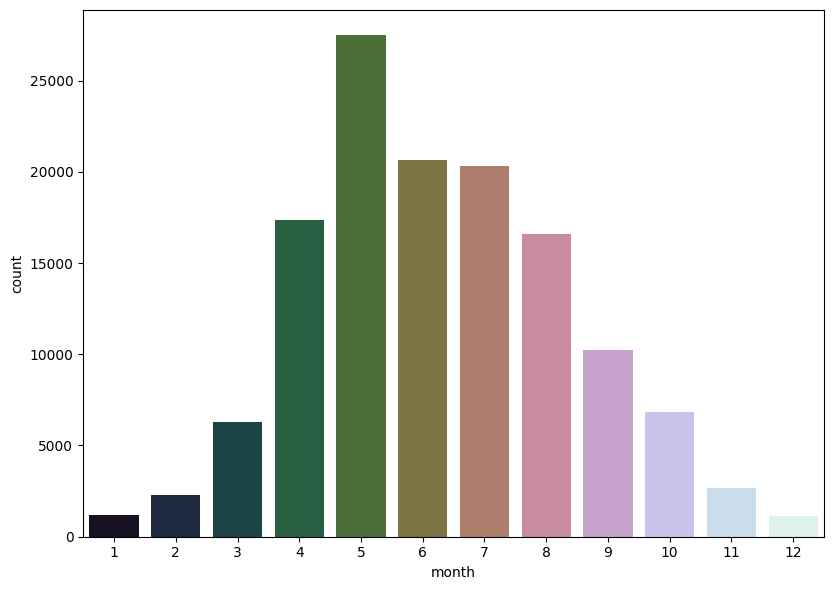

In [25]:
def plot_discrete2(df):
    plt.figure(figsize=(16, 6))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df, palette = "cubehelix")
    plt.tight_layout()
    plt.show()

plot_discrete2(europe_month_df)   

Follows the expected pattern related to life-cicle of many plants, increasing in spring and decreasing in autumn. Now, let's compare it with a region in the global south:

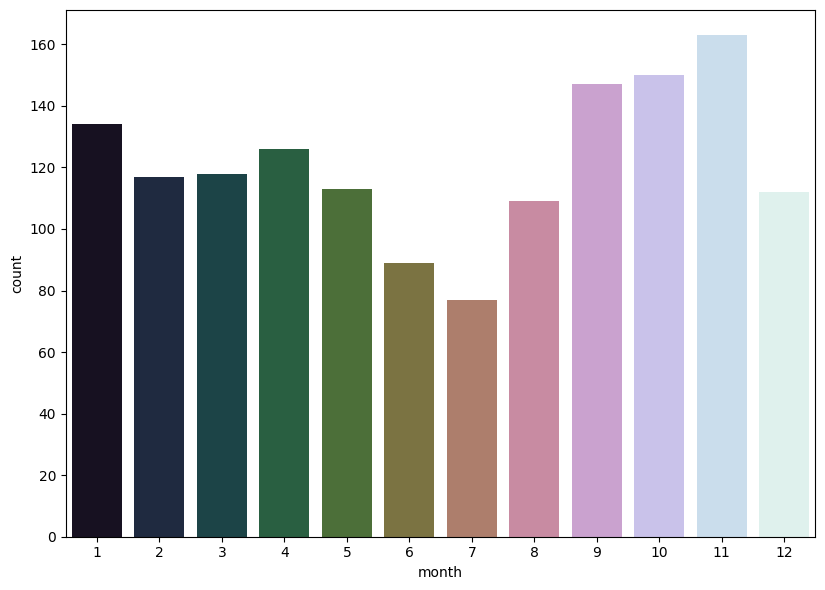

In [26]:
southam_month = plant_nan[plant_nan['region'] == 'South America']['month']
southam_month_df=pd.DataFrame(data=southam_month)
plot_discrete2(southam_month_df)

Patterns are connected to the seasons in different parts of the world. This information is important for future campaigns to increase the numbers of users (need to adapt according to region)

### Weekly patterns

In [18]:
# Extract the name of the day of the week from the date to look for users' patterns
plant_nan['eventdate'] = pd.to_datetime(plant_nan['eventdate'])
plant_nan['day_week']=plant_nan['eventdate'].dt.day_name()
plant_nan.head()

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,decimallatitude,decimallongitude,...,day,month,year,country,incomeperperson,internetuserate,urbanrate,internetuserate_groups,region,day_week
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,39.737365,-0.828874,...,28,5,2016,Spain,15461.75837,65.808554,77.12,middle,Europe,Saturday
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,43.068620,5.817762,...,18,8,2019,France,22878.46657,77.498619,77.36,high,Europe,Sunday
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,45.852500,-0.155000,...,20,5,2022,France,22878.46657,77.498619,77.36,high,Europe,Friday
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,43.151389,5.736667,...,14,4,2019,France,22878.46657,77.498619,77.36,high,Europe,Sunday
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,48.079440,7.587583,...,14,3,2022,Germany,25306.18719,82.526898,73.64,high,Europe,Monday


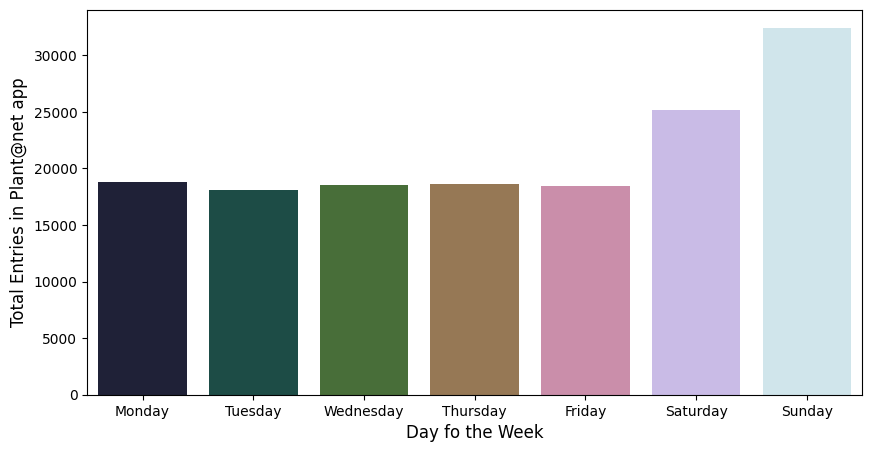

In [27]:
# visualize the overall number of entries per day of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='day_week', data=plant_nan, palette = "cubehelix", order=order, ax=ax)
# Set label for x-axis
ax.set_xlabel( "Day fo the Week" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Total Entries in Plant@net app" , size = 12 )
plt.show()

## Regional analysis
Although some regional patterns have already been shown

In [ ]:
# Internet user rate and entries in the app by region and country
country_users_internet = plant_nan.pivot_table(index=['country', 'region'], values=['internetuserate', 'occurrenceid'], 
                                               aggfunc = {'internetuserate':'mean','occurrenceid':'count'}).rename(columns={'occurrenceid':'total_entries'}).reset_index()

country_users_internet

In [ ]:
#fig, ax = plt.subplots(figsize=(10, 5))
sns.lmplot(x='internetuserate', y='total_entries', data=country_users_internet,
           fit_reg=False, # No regression line
           hue='region')
plt.show()

In [ ]:
# the function differeciates between Europe + North America and the other regions
def plot_entries_internet(df):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

    # plot for Europe and North America
    europe_na_df = df[df['region'].isin(['Europe', 'North America'])]
    sns.scatterplot(data=europe_na_df, x='internetuserate', y='total_entries', hue='region', ax=axs[0])

    # plot for all other regions
    other_df = df[~df['region'].isin(['Europe', 'North America'])]
    sns.scatterplot(data=other_df, x='internetuserate', y='total_entries', hue='region', ax=axs[1])

    # set the axis labels and titles
    axs[0].set_xlabel('Internet User Rate')
    axs[0].set_ylabel('Total Entries')
    axs[0].set_title('Europe and North America')

    axs[1].set_xlabel('Internet User Rate')
    axs[1].set_ylabel('Total Entries')
    axs[1].set_title('All Other Regions')

    plt.show()
    
plot_entries_internet(country_users_internet) # test this plot in Tableau    

## Plant analysis
In this section we will analize the "most popular" plants (those with more entries) 

### Order

In [ ]:
# total entries in the app (using the unique values of 'occurrenceid') by order of plants
plant_order_df = plant_nan.pivot_table(index=['order'], values=['urbanrate', 'occurrenceid'], 
                                               aggfunc = {'urbanrate':'mean','occurrenceid':'count'}
                                      ).rename(columns={'urbanrate':'mean_urbanrate','occurrenceid':'total_entries'}).reset_index()

plant_order_df

In [ ]:
# sort values of previous table by total entries ot get the top10 most registered plant order
plant_order_top10 = plant_order_df.sort_values(by='total_entries', ascending=False).head(10)


In [ ]:
# plot top10 orders: mean_urbanrate vs total_entries
sns.lmplot(x='mean_urbanrate', y='total_entries', data=plant_order_top10,
           fit_reg=False, # No regression line
           hue='order')
plt.show()

In [ ]:
# plot ALL the orders: mean_urbanrate vs total_entries
sns.lmplot(x='mean_urbanrate', y='total_entries', data=plant_order_df,
           fit_reg=False) # No regression line
 
plt.show()

### Genus

In [ ]:
plant_genus_df = plant_nan.pivot_table(index=['genus'], values=['urbanrate', 'occurrenceid'], 
                                               aggfunc = {'urbanrate':'mean','occurrenceid':'count'}
                                      ).rename(columns={'urbanrate':'mean_urbanrate','occurrenceid':'total_entries'}).reset_index()

plant_genus_df.head()

In [ ]:
# sort values of previous table by total entries ot get the top10 most registered plant genus
plant_genus_top10 = plant_genus_df.sort_values(by='total_entries', ascending=False).head(10)
plant_genus_top10

In [ ]:
# plot top10 genus: mean_urbanrate vs total_entries
sns.lmplot(x='mean_urbanrate', y='total_entries', data=plant_genus_top10,
           fit_reg=False, # No regression line
           hue='genus',
          palette='cubehelix')
plt.show()

In [ ]:
# plot ALL the genus: mean_urbanrate vs total_entries
sns.lmplot(x='mean_urbanrate', y='total_entries', data=plant_genus_df,
           fit_reg=False # No regression line
          )
plt.show()

## Urban rate

We can observe, also from the 'orders' graph, that the highest numbers of total_entries occur in those areas with urbanrates.

In [ ]:
def filter_urbanrate(df, min_urbanrate, max_urbanrate):
    '''
    This function filters the urbanrate column by a given min and a max values
    Returns: filtered dataframe
    '''
    filtered_df = df[(df['urbanrate'] >= min_urbanrate) & (df['urbanrate'] <= max_urbanrate)]
    return filtered_df

mid_high_urbanrate_df = filter_urbanrate(plant_nan, 70, 80)
mid_high_urbanrate_df.head()